In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import stan
import arviz as az

import nest_asyncio
nest_asyncio.apply()

In [26]:
program_code_1HT = """ 
data { 
    int<lower=0> N ; 
    int<lower=0> K;
    array[K] int<lower=0,upper=1> wordPresent;
    array[K] int<lower=0,upper=1> response;
}

parameters{
    real<lower=0,upper=1> theta;
}

model{
    for(i in 1:K){
        if(wordPresent[i] ==1)
            response[i] ~ bernoulli(1-theta);
        else
            response[i] ~ bernoulli(theta);
    }
}


"""

In [27]:
#Original List: Drum, Curtain, Bell, Coffee, School, Parent, Moon, Garden, Hat, Farmer, Nose, Turkey, Color, House, River, Desk, Ranger, Mountain, Glasses, Towel
#Modified List:     , Curtain, Bell,       , School, Parent,     , Garden,    ,       , Nose,       , Color,      , River,     ,       , Mountain,        , Towel
wordPresent = [0,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1]
responses =   [1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1] 

stan_dict = {
    'N' : 200,
    'K' :20,
    'wordPresent' : np.array(wordPresent),
    'response' : np.array(responses)
}

posterior = stan.build(program_code_1HT, data=stan_dict,random_seed=42)

fit = posterior.sample(num_chains=2,num_samples=2500,num_warmup = 1000)

Building...

In file included from /Users/michaelchen/Library/Caches/httpstan/4.12.0/models/gxqitkap/model_gxqitkap.cpp:2:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/math/rev.hpp:4:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/math/prim/fun/Eigen.hpp:23:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/Eigen/Sparse:26:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/Eigen/SparseCore:61:
/opt/anaconda3/lib/python3.11/site-packages/httpstan/include/Eigen/src/SparseCore/TriangularSolver.h:273:13: warning: variable 'count' set but not used [-Wunused-but-set-variable]
      Index count = 0;
            ^
In file included from /Users/micha

4 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable
ld: warning: object file (/opt/anaconda3/lib/python3.11/site-packages/httpstan/stan_services.o) was built for newer macOS version (12.0) than being linked (11.0)
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/opt/anaconda3/lib/python3.11/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(long double)::Q2' from file 'build/temp.macosx-11.0-arm64-cpython-311/Users/michaelchen/Library/Caches/httpstan/4.12.0/models/gxqitkap/model_gxqitkap.o' means the weak symbol cannot be overridden at runtime. This was likely caused by different translation units being compiled with different visibility settings.
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/opt/anaconda3/lib/python3.11/si

In [28]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.639,0.1,0.454,0.825,0.002,0.002,1748.0,2232.0,1.0


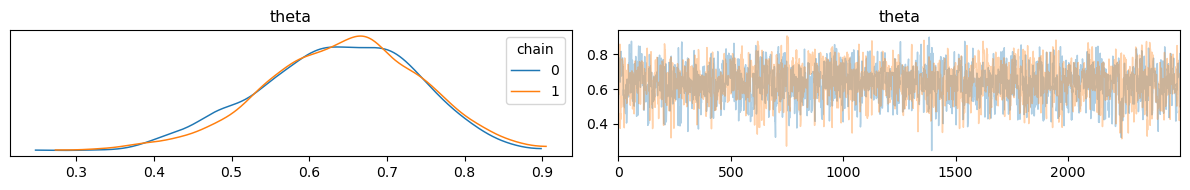

In [29]:
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()

In [32]:
program_code_2HT = """
data {
  int<lower=0> N;
  array[N] int<lower=0,upper=1> wordPresent;
  array[N] int<lower=0,upper=1> response;
}

parameters {
  real<lower=0,upper=1> theta_old; 
  real<lower=0,upper=1> theta_new;
  real<lower=0,upper=1> p_guess_old;
}

model {
  for (i in 1:N) {
    if (wordPresent[i] == 1) {
      target += log_mix(p_guess_old,
                        bernoulli_lpmf(1 | theta_old),
                        bernoulli_lpmf(0 | theta_old));
    } else {
      target += log_mix(1 - p_guess_old,
                        bernoulli_lpmf(0 | theta_new),
                        bernoulli_lpmf(1 | theta_new));
    }
  }
}



"""

In [33]:
wordPresent = [0,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1]
responses =   [1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1] 

stan_dict = {
    'N' : 20,
    'wordPresent' : np.array(wordPresent),
    'response' : np.array(responses)
}

posterior = stan.build(program_code_2HT, data=stan_dict,random_seed=42)

fit = posterior.sample(num_chains=2,num_samples=2500,num_warmup = 1000)

Building...

In file included from /Users/michaelchen/Library/Caches/httpstan/4.12.0/models/ighmat3w/model_ighmat3w.cpp:2:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/math/rev.hpp:4:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/stan/math/prim/fun/Eigen.hpp:23:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/Eigen/Sparse:26:
In file included from /opt/anaconda3/lib/python3.11/site-packages/httpstan/include/Eigen/SparseCore:61:
/opt/anaconda3/lib/python3.11/site-packages/httpstan/include/Eigen/src/SparseCore/TriangularSolver.h:273:13: warning: variable 'count' set but not used [-Wunused-but-set-variable]
      Index count = 0;
            ^
In file included from /Users/micha

4 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable
ld: warning: object file (/opt/anaconda3/lib/python3.11/site-packages/httpstan/stan_services.o) was built for newer macOS version (12.0) than being linked (11.0)
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/opt/anaconda3/lib/python3.11/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(long double)::Q2' from file 'build/temp.macosx-11.0-arm64-cpython-311/Users/michaelchen/Library/Caches/httpstan/4.12.0/models/ighmat3w/model_ighmat3w.o' means the weak symbol cannot be overridden at runtime. This was likely caused by different translation units being compiled with different visibility settings.
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/opt/anaconda3/lib/python3.11/si

In [34]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta_old,0.501,0.420,0.008,0.995,0.292,0.246,3.0,68.0,1.83
theta_new,0.499,0.419,0.003,0.990,0.291,0.245,3.0,64.0,1.83
p_guess_old,0.499,0.451,0.001,0.993,0.317,0.268,3.0,61.0,1.83


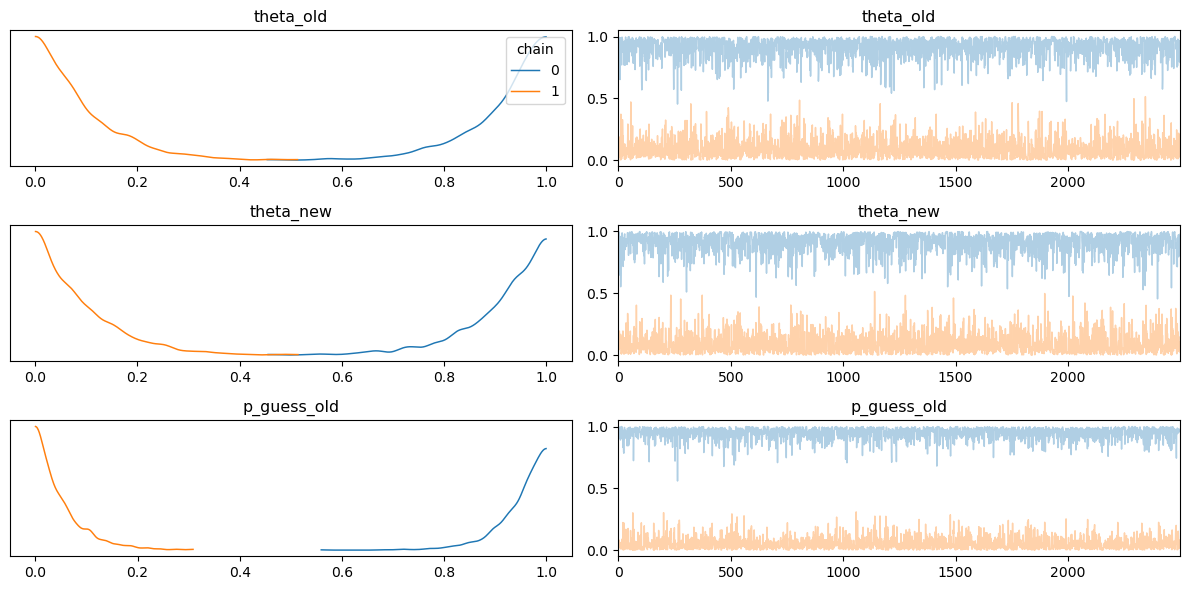

In [35]:
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()